In [5]:
# Buen Trabajo
#5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv("Colombia_COVID19_Coronavirus_casos_diarios.csv")
df.head()

OBJECTID  NUEVOS_CASOS  TOTAL_CASOS  TOTAL_MUERTES  TOTAL_RECUPERADOS  \
0      1237             1            1              0                  0   
1      1238             0            1              0                  0   
2      1239             0            1              0                  0   
3      1240             2            3              0                  0   
4      1241             0            3              0                  0   

      FECHA_ACTUALIZACION                              GlobalID  \
0  2020/03/06 05:00:00+00  bfbde439-2467-4f24-9b33-2fb38e3abd61   
1  2020/03/07 05:00:00+00  c21b35c0-d55e-44e0-8768-9356c9c1d545   
2  2020/03/08 05:00:00+00  0a1a91f7-15eb-4118-9879-1ab4d959b1d2   
3  2020/03/09 05:00:00+00  2fb6f539-a27c-4d00-84e1-b19193ceb500   
4  2020/03/10 05:00:00+00  f14b28c9-d593-4a53-9e2a-d7965c38c22c   

   NUEVOS_MUERTOS  NUEVO_RECUPERADOS  
0               0                  0  
1               0                  0  
2               0                  0  
3               0                  0  
4               0                  0

In [12]:
df_max_scaled=df.copy() #hacer una copia
df_max_scaled["norm_new_cases"]=df_max_scaled["NUEVOS_CASOS"]/df_max_scaled["NUEVOS_CASOS"].abs().max() #normalizar

In [13]:
df_max_scaled["FECHA_NEW"]=pd.to_datetime(df_max_scaled["FECHA_ACTUALIZACION"])

In [14]:
h=10
def fun(num):
    if abs(num/h) <= 1:
        return 3/4*(1-(num/h)**2)
    else:
        return 0

In [15]:
k=[]
for date in sorted(df_max_scaled["FECHA_NEW"]):
    df_max_scaled["gauss_filter"]=(df_max_scaled["FECHA_NEW"]-date).dt.days.apply(fun)
    df_max_scaled["gauss_filter"] /=df_max_scaled["gauss_filter"].sum()
    k.append((df_max_scaled["gauss_filter"]*df_max_scaled["norm_new_cases"]).sum())
df_max_scaled["cases_Gaussian_filter"]=k

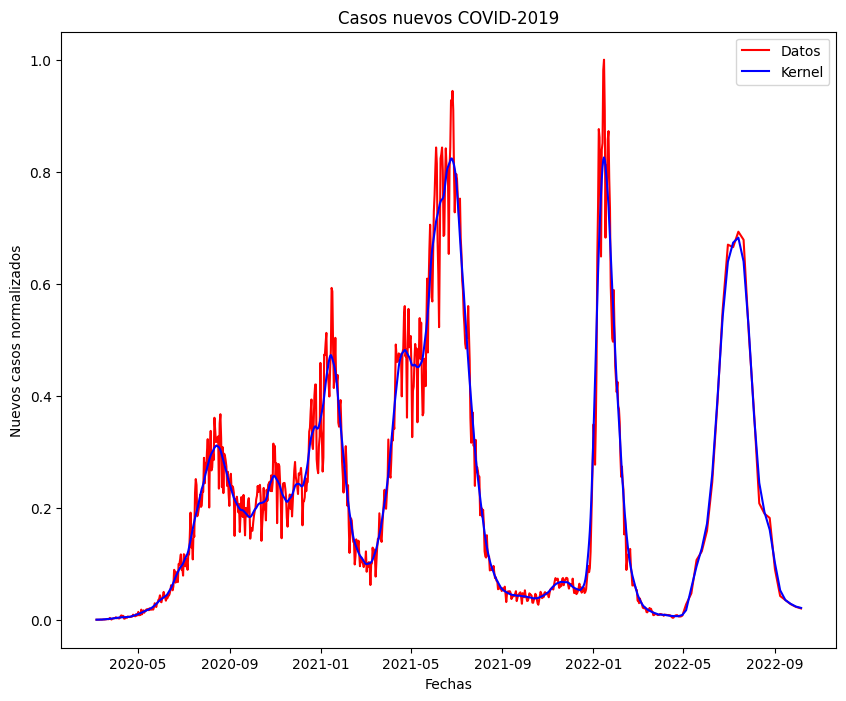

In [16]:
plt.figure(figsize=(10,8))
plt.plot(df_max_scaled["FECHA_NEW"],df_max_scaled["norm_new_cases"],color="red",label="Datos")
plt.plot(df_max_scaled["FECHA_NEW"],df_max_scaled["cases_Gaussian_filter"],color="blue",label="Kernel")
plt.xlabel("Fechas")
plt.ylabel("Nuevos casos normalizados")
plt.title("Casos nuevos COVID-2019")
plt.legend()